# AV Data Science Team Hiring Hackathon

## 1. Problem Statement

__Your client is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across country. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.__
<br>


__Overview of your client On-boarding process__
<br>
The Managers at your client are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to your client to become an agent. This date is known as application_receipt_date.
<br>
In the next 3 months, this potential agent has to undergo a 7 days training at the your client's branch (about Sales processes and various products) and clear a subsequent examination in order to become an agent.
<br>



__The problem - Who are the best agents?__
<br>
As is obvious in the above process, there is a significant investment which your cleint makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business.
<br>
Your client is looking for help from data scientists like you to help them provide insigths using their past recruitment data. They want to predict the target variable for each potential agent, which would help them identify the right agents to hire.


### Data Description
| Variable | Definition |
| --- | --- |
| ID | Unique Application ID |
| Office_PIN | PINCODE of Your client's Offices |
| Application_Receipt_Date | Date of Application |
| Applicant_City_PIN | PINCODE of Applicant Address |
| Applicant_Gender | Applicant's Gender |
| Applicant_BirthDate | Applicant's Birthdate |
| Applicant_Marital_Status | Applicant's Marital Status |
| Applicant_Occupation | Applicant's Occupation |
| Applicant_Qualification | Applicant's Educational Qualification |
| Manager_DOJ | Manager's Date of Joining |
| Manager_Joining_Designation | Manager's Joining Designation |
| Manager_Current_Designation | Manager's Designation at the time of application sourcing |
| Manager_Grade | Manager's Grade |
| Manager_Status | Current Employment Status (Probation / Confirmation) |
| Manager_Gender | Manager's Gender |
| Manager_DoB | Manager's Birthdate |
| Manager_Num_Application | No. of Applications sourced in last 3 months by the Manager |
| Manager_Num_Coded | No. of agents recruited by the manager in last 3 months |
| Manager_Business | Amount of business sourced by the manager in last 3 months |
| Manager_Num_Products | Number of products sold by the manager in last 3 months |
| Manager_Business2 | Amount of business sourced by the manager in last 3 months excluding business from their Category A advisor |
| Manager_Num_Products2 | Number of products sold by the manager in last 3 months excluding business from their Category A advisor |
| Business_Sourced(Target) | Business sourced by applicant within 3 months [1/0] of recruitment |


## 2. EDA and model building

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [59]:
train = pd.read_csv("Train_gQ1XM0h.csv")
test = pd.read_csv("Test_wyCirpO_aS3XPkc.csv")
df = pd.concat([train, test], axis=0)

df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0.0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11-10-2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1.0
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,03-03-1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0.0
3,FIN1000004,814112,4/16/2007,814112.0,M,02-03-1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0.0
4,FIN1000005,814112,4/16/2007,815351.0,M,07-04-1985,M,Others,Class XII,05-08-2006,...,Confirmation,M,02-07-1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0.0


In [60]:
df.tail()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
5040,FIN1014568,691008,1/1/2009,691601.0,F,5/21/1966,M,Others,Graduate,12/2/2008,...,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5041,FIN1014569,691008,1/1/2009,691601.0,M,12/2/1949,M,Others,Graduate,12/2/2008,...,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5042,FIN1014570,691008,1/1/2009,691005.0,M,5/20/1977,M,Business,Class XII,12/2/2008,...,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5043,FIN1014571,208001,1/1/2009,208022.0,M,7/22/1985,M,NaN,Graduate,9/25/2008,...,Probation,M,6/26/1978,4.0,1.0,15347.0,1.0,15347.0,1.0,NaN
5044,FIN1014572,122002,1/1/2009,122001.0,M,5/12/1985,M,NaN,Graduate,12/19/2008,...,Probation,M,12/29/1983,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [61]:
df.isnull().sum()[df.isnull().sum() != 0]

Applicant_City_PIN              131
Applicant_Gender                 89
Applicant_BirthDate              96
Applicant_Marital_Status        103
Applicant_Occupation           2225
Applicant_Qualification         130
Manager_DOJ                    1507
Manager_Joining_Designation    1507
Manager_Current_Designation    1507
Manager_Grade                  1507
Manager_Status                 1507
Manager_Gender                 1507
Manager_DoB                    1507
Manager_Num_Application        1507
Manager_Num_Coded              1507
Manager_Business               1507
Manager_Num_Products           1507
Manager_Business2              1507
Manager_Num_Products2          1507
Business_Sourced               5045
dtype: int64

In [62]:
df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [63]:
#No use columns as of now ['ID', 'Office_PIN', 'Applicant_City_PIN', 'Manager_DOJ', 'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_DoB']
df.drop(['ID', 'Office_PIN', 'Applicant_City_PIN', 'Manager_DOJ', 'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_DoB'], axis=1, inplace=True)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14572 entries, 0 to 5044
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Application_Receipt_Date  14572 non-null  object 
 1   Applicant_Gender          14483 non-null  object 
 2   Applicant_BirthDate       14476 non-null  object 
 3   Applicant_Marital_Status  14469 non-null  object 
 4   Applicant_Occupation      12347 non-null  object 
 5   Applicant_Qualification   14442 non-null  object 
 6   Manager_Grade             13065 non-null  float64
 7   Manager_Status            13065 non-null  object 
 8   Manager_Gender            13065 non-null  object 
 9   Manager_Num_Application   13065 non-null  float64
 10  Manager_Num_Coded         13065 non-null  float64
 11  Manager_Business          13065 non-null  float64
 12  Manager_Num_Products      13065 non-null  float64
 13  Manager_Business2         13065 non-null  float64
 14  Manager

In [65]:
df['Application_Receipt_Age_Year'] = pd.to_datetime("today").year - pd.DatetimeIndex(df['Application_Receipt_Date']).year
df['Application_Receipt_Age_Month'] = pd.to_datetime("today").month - pd.DatetimeIndex(df['Application_Receipt_Date']).month
df.drop(['Application_Receipt_Date'], axis=1, inplace=True)

df['Applicant_BirthDate_Year'] = pd.to_datetime("today").year - pd.DatetimeIndex(df['Applicant_BirthDate']).year
df.drop(['Applicant_BirthDate'], axis=1, inplace=True)

In [67]:
df['Applicant_Gender'].fillna('Other',inplace=True)

df['Applicant_Marital_Status'].replace('W', 'Other', inplace=True)
df['Applicant_Marital_Status'].replace('D', 'Other', inplace=True)
df['Applicant_Marital_Status'].fillna('Other',inplace=True)

df['Applicant_Occupation'].replace('Self Employed', 'Others', inplace=True)
df['Applicant_Occupation'].replace('Student', 'Others', inplace=True)
df['Applicant_Occupation'].fillna('Others',inplace=True)

df['Applicant_Qualification'].replace('Masters of Business Administration', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Professional Qualification in Marketing', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Associate / Fellow of Institute of Chartered Accountans of India', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Certified Associateship of Indian Institute of Bankers', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Associate/Fellow of Institute of Institute of Costs and Works Accountants of India', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Associate/Fellow of Institute of Company Secretories of India', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Associate/Fellow of Insurance Institute of India', 'PG', inplace=True)
df['Applicant_Qualification'].replace('Associate/Fellow of Acturial Society of India', 'PG', inplace=True)
df['Applicant_Qualification'].fillna('Others',inplace=True)

df['Applicant_BirthDate_Year'].fillna(df['Applicant_BirthDate_Year'].median(),inplace=True)

* Filled the missing value of __Applicant_Gender__ as __other__.
* Filled the missing value of __Applicant_Marital_Status__ as __other__ and combined "W" and "D" to other.
* Filled the missing value of __Applicant_Occupation__ as __others__ and combined "Self Employed" and "Student" to others.
* Filled the missing value of __Applicant_Qualification__ as __others__ and combined single categories as "PG".
* Filled the missing value of __Applicant_BirthDate_Year__ with __median__.

In [69]:
df.drop(['Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_Business2', 'Manager_Num_Products2'], axis=1, inplace=True)

In [72]:
df['Manager_Num_Application'].fillna(df['Manager_Num_Application'].median(),inplace=True)
df['Manager_Business'].fillna(df['Manager_Business'].median(),inplace=True)
df['Manager_Num_Products'].fillna(df['Manager_Num_Products'].median(),inplace=True)
df['Manager_Num_Coded'].fillna(df['Manager_Num_Coded'].median(),inplace=True)

* Filled the missing value of __Manager_Num_Application__ with __median__.
* Filled the missing value of __Manager_Business__ with __median__.
* Filled the missing value of __Manager_Num_Products__ with __median__.
* Filled the missing value of __Manager_Num_Coded__ with __median__.

In [76]:
df['Application_Receipt_Age_Month'].replace(-1, 9, inplace=True)
df['Application_Receipt_Age_Month'].replace(-2, 10, inplace=True)
df['Application_Receipt_Age_Month'].replace(-3, 11, inplace=True)
df['Application_Receipt_Age_Month'].value_counts()

2     2095
4     1906
11    1740
1     1585
10    1441
0     1255
3     1188
9     1114
5     1014
8      629
7      418
6      187
Name: Application_Receipt_Age_Month, dtype: int64

In [78]:
df['Manager_Num_Application'] = df['Manager_Num_Application'].astype('int')
df['Manager_Business'] = df['Manager_Business'].astype('int')
df['Manager_Num_Products'] = df['Manager_Num_Products'].astype('int')
df['Manager_Num_Coded'] = df['Manager_Num_Coded'].astype('int')

In [80]:
bins = [0, 5, 10, 15, 20, 25, 30, 105]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
df['Manager_Num_Products'] = pd.cut(df.Manager_Num_Products, bins, labels = labels,include_lowest = True)

df['Manager_Num_Products'].replace('0-5', '0', inplace=True)
df['Manager_Num_Products'].replace('5-10', '1', inplace=True)
df['Manager_Num_Products'].replace('10-15', '2', inplace=True)
df['Manager_Num_Products'].replace('15-20', '3', inplace=True)
df['Manager_Num_Products'].replace('20-25', '4', inplace=True)
df['Manager_Num_Products'].replace('25-30', '5', inplace=True)
df['Manager_Num_Products'].replace('30+', '6', inplace=True)

bins = [-265289, 0, 1529756, 3578265]
labels = ['defaulter', 'below_Avg', 'above_Avg']
df['Manager_Business'] = pd.cut(df.Manager_Business, bins, labels = labels,include_lowest = True)

df['Manager_Business'].replace('defaulter', '0', inplace=True)
df['Manager_Business'].replace('below_Avg', '1', inplace=True)
df['Manager_Business'].replace('above_Avg', '2', inplace=True)

In [82]:
from sklearn.preprocessing import LabelEncoder

#label encode the cateorical features
le = LabelEncoder()

df['Application_Receipt_Age_Year'] = le.fit_transform(df['Application_Receipt_Age_Year'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

bins = [0, 30, 60, 100]
labels = ['0-29', '30-59', '60+']
df['Applicant_BirthDate_Year_range'] = pd.cut(df.Applicant_BirthDate_Year, bins, labels = labels,include_lowest = True)

df['Applicant_BirthDate_Year_range'] = le.fit_transform(df['Applicant_BirthDate_Year_range'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df.drop(['Applicant_BirthDate_Year'], axis=1, inplace=True)

df['Applicant_Qualification'] = le.fit_transform(df['Applicant_Qualification'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{11: 0, 12: 1, 13: 2}
{'0-29': 0, '30-59': 1, '60+': 2}
{'Class X': 0, 'Class XII': 1, 'Graduate': 2, 'Others': 3, 'PG': 4}


In [89]:
ag = pd.get_dummies(df.Applicant_Gender, prefix='Applicant_Gender', drop_first=True)
ams = pd.get_dummies(df.Applicant_Marital_Status, prefix='Applicant_Marital_Status', drop_first=True)
ao = pd.get_dummies(df.Applicant_Occupation, prefix='Applicant_Occupation', drop_first=True)

In [93]:
df = pd.concat([df, ag, ams, ao], axis=1)

In [95]:
df.drop(['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation'], axis=1, inplace=True)
df.head()

,Applicant_Qualification,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Application_Receipt_Age_Year,Application_Receipt_Age_Month,Applicant_BirthDate_Year_range,Applicant_Gender_M,Applicant_Gender_Other,Applicant_Marital_Status_Other,Applicant_Marital_Status_S,Applicant_Occupation_Others,Applicant_Occupation_Salaried
0,2,2,1,1,5,0.0,2,5,1,1,0,0,0,1,0
1,1,2,1,1,5,1.0,2,5,1,1,0,0,1,1,0
2,1,0,0,1,4,0.0,2,5,1,1,0,0,0,0,0
3,1,0,0,1,4,0.0,2,5,1,1,0,0,1,0,1
4,1,2,1,1,3,0.0,2,5,1,1,0,0,0,1,0


In [98]:
#df['Application_Receipt_Age_Month'].median()
df.drop(['Application_Receipt_Age_Month'], axis=1, inplace=True)
# Deleting month values

In [129]:
df['Manager_Business'] = df['Manager_Business'].astype('int')
df['Manager_Num_Products'] = df['Manager_Num_Products'].astype('int')

In [99]:
df.head()

,Applicant_Qualification,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Application_Receipt_Age_Year,Applicant_BirthDate_Year_range,Applicant_Gender_M,Applicant_Gender_Other,Applicant_Marital_Status_Other,Applicant_Marital_Status_S,Applicant_Occupation_Others,Applicant_Occupation_Salaried
0,2,2,1,1,5,0.0,2,1,1,0,0,0,1,0
1,1,2,1,1,5,1.0,2,1,1,0,0,1,1,0
2,1,0,0,1,4,0.0,2,1,1,0,0,0,0,0
3,1,0,0,1,4,0.0,2,1,1,0,0,1,0,1
4,1,2,1,1,3,0.0,2,1,1,0,0,0,1,0


In [126]:
df['Manager_Business'].value_counts()

1    9819
0    4699
2      54
Name: Manager_Business, dtype: int64

In [127]:
df['Manager_Num_Products'].value_counts()

0    9028
1    2667
2    1541
3     720
4     306
6     170
5     140
Name: Manager_Num_Products, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14572 entries, 0 to 5044
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Applicant_Qualification         14572 non-null  int32  
 1   Manager_Num_Application         14572 non-null  int32  
 2   Manager_Num_Coded               14572 non-null  int32  
 3   Manager_Business                14572 non-null  int32  
 4   Manager_Num_Products            14572 non-null  int32  
 5   Business_Sourced                9527 non-null   float64
 6   Application_Receipt_Age_Year    14572 non-null  int64  
 7   Applicant_BirthDate_Year_range  14572 non-null  int32  
 8   Applicant_Gender_M              14572 non-null  uint8  
 9   Applicant_Gender_Other          14572 non-null  uint8  
 10  Applicant_Marital_Status_Other  14572 non-null  uint8  
 11  Applicant_Marital_Status_S      14572 non-null  uint8  
 12  Applicant_Occupation_Others     1

<AxesSubplot:xlabel='Manager_Num_Coded', ylabel='count'>

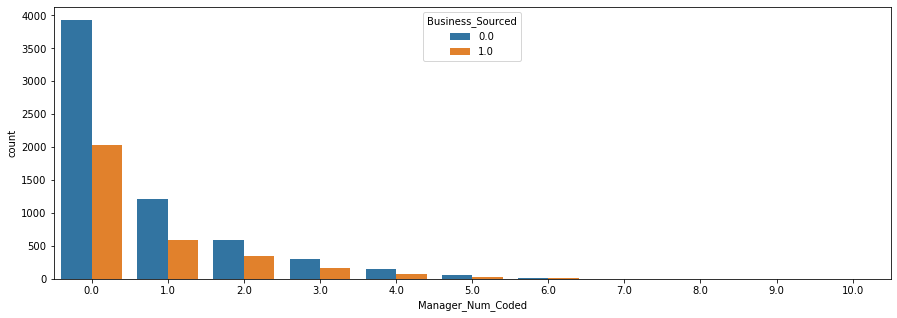

In [45]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Manager_Num_Coded', hue="Business_Sourced", data=df, ax=axis1)

<AxesSubplot:xlabel='Manager_Business', ylabel='count'>

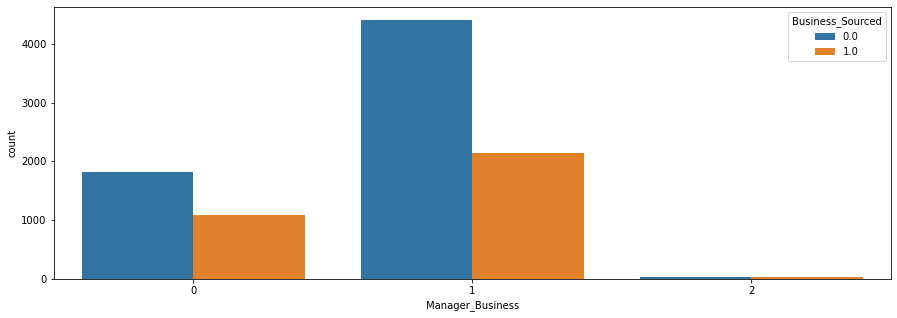

In [46]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='Manager_Business', hue="Business_Sourced", data=df, ax=axis1)

In [131]:
# train data 9527
# test data 5045

train = pd.DataFrame()
test = pd.DataFrame()

if df.shape[0] > 9527:
    train = df[:9527]
    test = df[9527:]

In [132]:
train.head()

,Applicant_Qualification,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Application_Receipt_Age_Year,Applicant_BirthDate_Year_range,Applicant_Gender_M,Applicant_Gender_Other,Applicant_Marital_Status_Other,Applicant_Marital_Status_S,Applicant_Occupation_Others,Applicant_Occupation_Salaried
0,2,2,1,1,5,0.0,2,1,1,0,0,0,1,0
1,1,2,1,1,5,1.0,2,1,1,0,0,1,1,0
2,1,0,0,1,4,0.0,2,1,1,0,0,0,0,0
3,1,0,0,1,4,0.0,2,1,1,0,0,1,0,1
4,1,2,1,1,3,0.0,2,1,1,0,0,0,1,0


In [133]:
X = train.loc[:, train.columns != 'Business_Sourced']
y = train['Business_Sourced']
X.shape, y.shape

((9527, 13), (9527,))

In [134]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7621, 13) (7621,)
(1906, 13) (1906,)


In [105]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [92]:
#!pip install xgboost

In [135]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_test = logreg.predict(X_test)

# Accuracy score
logreg_ac = accuracy_score(y_test, y_pred_test)*100
print('Accuracy is :',logreg_ac)

Accuracy is : 65.58237145855193


In [136]:
# Confusion matrix
def print_confusion_matrix_recruit(y_actual, y_pred, modelName):
    cnf_matrix = confusion_matrix(y_actual, y_pred)
    cnf_mat_df = pd.DataFrame(cnf_matrix)
    cnf_mat_df.index = ['Actual recruit','Actual not_recruit']
    cnf_mat_df.columns = ['Predicted recruit','Predicted not_recruit']
    print("Confusion matrix for %s model" %modelName)
    print(cnf_mat_df)

In [137]:
print_confusion_matrix_recruit(y_test, y_pred_test, "Logistic Regression")

Confusion matrix for Logistic Regression model
                    Predicted recruit  Predicted not_recruit
Actual recruit                   1242                     14
Actual not_recruit                642                      8


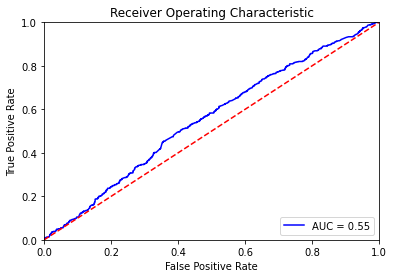

In [138]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [139]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79      1256
         1.0       0.36      0.01      0.02       650

    accuracy                           0.66      1906
   macro avg       0.51      0.50      0.41      1906
weighted avg       0.56      0.66      0.53      1906



In [140]:
# Decision Tree Clasifiers
dtmodel = tree.DecisionTreeClassifier(random_state = 123)
dtmodel.fit(X_train, y_train)

y_pred_test1 = dtmodel.predict(X_test)

DecisionT_Accuracy = accuracy_score(y_test,y_pred_test1)*100
print('Accuracy:', DecisionT_Accuracy)

print_confusion_matrix_recruit(y_test, y_pred_test1, "Decision Tree")

Accuracy: 62.17208814270724
Confusion matrix for Decision Tree model
                    Predicted recruit  Predicted not_recruit
Actual recruit                   1014                    242
Actual not_recruit                479                    171


In [141]:
print(metrics.classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

         0.0       0.68      0.81      0.74      1256
         1.0       0.41      0.26      0.32       650

    accuracy                           0.62      1906
   macro avg       0.55      0.54      0.53      1906
weighted avg       0.59      0.62      0.60      1906



In [142]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)

y_pred_test2 = rfc.predict(X_test)

rfc_ac = accuracy_score(y_test,y_pred_test2)*100
print('Accuracy is :',rfc_ac)

print_confusion_matrix_recruit(y_test, y_pred_test2, "Random Forest Classifier")

Accuracy is : 61.90975865687304
Confusion matrix for Random Forest Classifier model
                    Predicted recruit  Predicted not_recruit
Actual recruit                   1009                    247
Actual not_recruit                479                    171


In [143]:
print(metrics.classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.68      0.80      0.74      1256
         1.0       0.41      0.26      0.32       650

    accuracy                           0.62      1906
   macro avg       0.54      0.53      0.53      1906
weighted avg       0.59      0.62      0.59      1906



In [144]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors =1 )
knn.fit(X_train, y_train)

y_pred_test3 = knn.predict(X_test)

knn_ac = accuracy_score(y_test,y_pred_test3)*100
print('Accuracy is :',knn_ac)

print_confusion_matrix_recruit(y_test, y_pred_test3, "KNN")

Accuracy is : 55.456453305351516
Confusion matrix for KNN model
                    Predicted recruit  Predicted not_recruit
Actual recruit                    804                    452
Actual not_recruit                397                    253


In [145]:
print(metrics.classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65      1256
         1.0       0.36      0.39      0.37       650

    accuracy                           0.55      1906
   macro avg       0.51      0.51      0.51      1906
weighted avg       0.56      0.55      0.56      1906



In [146]:
# Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred_test4 = nb.predict(X_test)

nb_ac = accuracy_score(y_test,y_pred_test4)*100
print('Accuracy is :',nb_ac)

print_confusion_matrix_recruit(y_test, y_pred_test4, "Naive Bayes Classifier")

Accuracy is : 34.83735571878279
Confusion matrix for Naive Bayes Classifier model
                    Predicted recruit  Predicted not_recruit
Actual recruit                     15                   1241
Actual not_recruit                  1                    649


In [147]:
print(metrics.classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

         0.0       0.94      0.01      0.02      1256
         1.0       0.34      1.00      0.51       650

    accuracy                           0.35      1906
   macro avg       0.64      0.51      0.27      1906
weighted avg       0.73      0.35      0.19      1906



In [165]:
# SVC Model
svc = SVC(random_state = 123)
svc.fit(X_train, y_train)

y_pred_test5 = svc.predict(X_test)

svc_ac = accuracy_score(y_test,y_pred_test5)*100
print('Accuracy is :',svc_ac)

print_confusion_matrix_recruit(y_test, y_pred_test5, "SVC")

Accuracy is : 65.89716684155299
Confusion matrix for SVC model
                    Predicted recruit  Predicted not_recruit
Actual recruit                   1255                      1
Actual not_recruit                649                      1


In [204]:
print(metrics.classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79      1256
         1.0       0.50      0.00      0.00       650

    accuracy                           0.66      1906
   macro avg       0.58      0.50      0.40      1906
weighted avg       0.60      0.66      0.52      1906



In [150]:
# Gradient Boosting Model
gb_model= GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=1)
gb_model.fit(X_train, y_train)

y_pred_test6 = gb_model.predict(X_test)

gb_ac = accuracy_score(y_test,y_pred_test6)*100
print('Accuracy is :',gb_ac)

print_confusion_matrix_recruit(y_test, y_pred_test6, "Gradient Boosting")

Accuracy is : 65.63483735571877
Confusion matrix for Gradient Boosting model
                    Predicted recruit  Predicted not_recruit
Actual recruit                   1240                     16
Actual not_recruit                639                     11


In [151]:
print(metrics.classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79      1256
         1.0       0.41      0.02      0.03       650

    accuracy                           0.66      1906
   macro avg       0.53      0.50      0.41      1906
weighted avg       0.57      0.66      0.53      1906



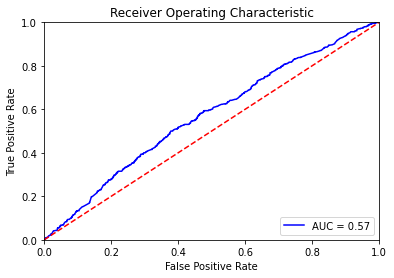

In [206]:
probs = gb_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [152]:
# XGBoost Model
xgb_model=XGBClassifier(random_state=1,learning_rate=0.10)
xgb_model.fit(X_train, y_train)

y_pred_test7=xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test,y_pred_test7)*100
print('Accuracy is :',xgb_ac)

print_confusion_matrix_recruit(y_test, y_pred_test7, "XGBoost")

Accuracy is : 65.42497376705143
Confusion matrix for XGBoost model
                    Predicted recruit  Predicted not_recruit
Actual recruit                   1211                     45
Actual not_recruit                614                     36


In [153]:
print(metrics.classification_report(y_test,y_pred_test7))

              precision    recall  f1-score   support

         0.0       0.66      0.96      0.79      1256
         1.0       0.44      0.06      0.10       650

    accuracy                           0.65      1906
   macro avg       0.55      0.51      0.44      1906
weighted avg       0.59      0.65      0.55      1906



In [170]:
# Hypertuning Parameters
rfc = RandomForestClassifier()
grid_param = {'n_estimators': [300,400,500,600], 'max_depth':[10,15,20], "min_samples_leaf": [2,4,6]}
rfc_grid = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5)
rfc_grid.fit(X_train , y_train)
y_pred_test_hp = rfc_grid.predict(X_test)

print(rfc_grid.best_params_)

selected_model = metrics.accuracy_score(y_test, y_pred_test_hp)*100
print('Accuracy is :',selected_model)

{'max_depth': 10, 'min_samples_leaf': 6, 'n_estimators': 600}
Accuracy is : 65.37250786988457


In [171]:
print(rfc_grid.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=6, n_estimators=600)


In [202]:
from sklearn.metrics import roc_auc_score
prob_y_2 = rfc_grid.predict_proba(X_test)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y_test, prob_y_2) )

0.5843471337579618


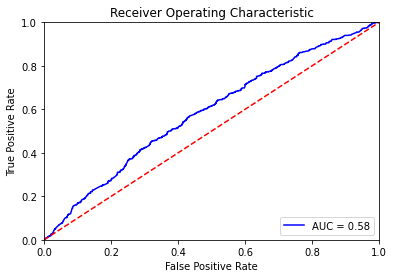

In [203]:
probs = rfc_grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [207]:
rfc1 = RandomForestClassifier()
grid_param1 = {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth':[5,10,15,20,25], "min_samples_leaf": [2,4,6,8]}
rfc_grid1 = GridSearchCV(estimator=rfc1, param_grid=grid_param1, cv=5)
rfc_grid1.fit(X_train , y_train)
y_pred_test_hp = rfc_grid1.predict(X_test)

print(rfc_grid1.best_params_)

selected_model = metrics.accuracy_score(y_test, y_pred_test_hp)*100
print('Accuracy is :',selected_model)

{'max_depth': 5, 'min_samples_leaf': 6, 'n_estimators': 200}
Accuracy is : 65.89716684155299


In [208]:
print(rfc_grid1.best_estimator_)

RandomForestClassifier(max_depth=5, min_samples_leaf=6, n_estimators=200)


In [209]:
from sklearn.metrics import roc_auc_score
prob_y_2 = rfc_grid1.predict_proba(X_test)
prob_y_2 = [p[1] for p in prob_y_2]
print( roc_auc_score(y_test, prob_y_2) )

0.5797152131308182


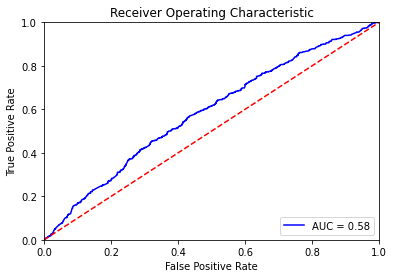

In [210]:
probs = rfc_grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Create submission file

In [154]:
df_sub = pd.read_csv("sample_submission_V7OCXsi.csv")
df_sub.head()

,ID,Business_Sourced
0,FIN1009528,0.5
1,FIN1009529,0.5
2,FIN1009530,0.5
3,FIN1009531,0.5
4,FIN1009532,0.5


In [156]:
test.drop(['Business_Sourced'], axis=1, inplace=True)

In [213]:
y_pred_f1 = rfc_grid.predict(test)
print(y_pred_f1.shape)

sub_id = df_sub['ID']
print(sub_id.shape)

y_prd = pd.DataFrame(y_pred_f1)
submission_df = pd.concat([sub_id, y_prd], axis=1)
submission_df.columns =['ID', 'Business_Sourced']
submission_df.head()

(5045,)
(5045,)


,ID,Business_Sourced
0,FIN1009528,0.0
1,FIN1009529,0.0
2,FIN1009530,0.0
3,FIN1009531,0.0
4,FIN1009532,0.0


In [214]:
submission_df['Business_Sourced'].unique()

array([0., 1.])

In [215]:
submission_df.to_csv('submission_rfc_grid.csv', header=True, index=False)